In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# which month is the dirtiest?

# Looking at the monthly mean e coli levels across all beaches, our results are mixed.
# Using the culture test data set, there isn't a strong seasonal pattern. But the DNA 
# data had a nice bell curve with July as the worst month for E Coli.

In [3]:
# starts with cleaned data

In [4]:
dna_data = pd.read_csv("Cleaned_Date_DNA_Data.csv")
culture_data = pd.read_csv("Cleaned_Date_culture_Data.csv")

In [5]:
culture_data.head()

,Unnamed: 0,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Latitude,Longitude,Sample Date,Sample Time
0,2231,113666.0,2016-08-04 08:30:00,Humboldt,1.0,1.0,1.0,41.90643,-87.703717,2016-08-04,08:30:00
1,2374,112689.0,2016-06-01 07:15:00,Calumet,629.0,1300.0,904.3,41.71420,-87.529900,2016-06-01,07:15:00
2,2375,112669.0,2016-06-01 08:00:00,Calumet,345.0,517.0,422.3,41.71420,-87.529900,2016-06-01,08:00:00
3,4980,109008.0,2013-05-26 00:00:00,57th Street,17.0,20.0,18.4,41.79110,-87.579700,2013-05-26,00:00:00
4,4983,93134.0,2015-07-07 00:00:00,Leone,727.0,727.0,727.0,42.01310,-87.663500,2015-07-07,00:00:00


In [6]:
test = "2016-08-04"

formatted = datetime.datetime.strptime(test, "%Y-%m-%d")

In [7]:
formatted.month

8

In [8]:
# pulling the month into its own column

In [9]:
dna_data["Sample Month"] = ""

for index, row in dna_data.iterrows():
    
    date = row["Sample Date"]
    
    formatted = datetime.datetime.strptime(date, "%Y-%m-%d")
    
    dna_data.loc[index, "Sample Month"] = formatted.month
    
# using striptime: https://stackoverflow.com/questions/26105804/extract-month-from-date-in-python/26105888


In [10]:
culture_data["Sample Month"] = ""

for index, row in culture_data.iterrows():
    
    date = row["Sample Date"]
    
    formatted = datetime.datetime.strptime(date, "%Y-%m-%d")
    
    culture_data.loc[index, "Sample Month"] = formatted.month

In [11]:
culture_data.head()

,Unnamed: 0,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Latitude,Longitude,Sample Date,Sample Time,Sample Month
0,2231,113666.0,2016-08-04 08:30:00,Humboldt,1.0,1.0,1.0,41.90643,-87.703717,2016-08-04,08:30:00,8
1,2374,112689.0,2016-06-01 07:15:00,Calumet,629.0,1300.0,904.3,41.71420,-87.529900,2016-06-01,07:15:00,6
2,2375,112669.0,2016-06-01 08:00:00,Calumet,345.0,517.0,422.3,41.71420,-87.529900,2016-06-01,08:00:00,6
3,4980,109008.0,2013-05-26 00:00:00,57th Street,17.0,20.0,18.4,41.79110,-87.579700,2013-05-26,00:00:00,5
4,4983,93134.0,2015-07-07 00:00:00,Leone,727.0,727.0,727.0,42.01310,-87.663500,2015-07-07,00:00:00,7


In [12]:
#finding the monthly mean across all beaches and plotting

In [13]:
dna_by_month = dna_data.groupby("Sample Month")
culture_by_month = culture_data.groupby("Sample Month")

In [14]:
dna_y_axis = dna_by_month["DNA Reading Mean"].mean()
dna_y_axis

Sample Month
5    294.675561
6    491.519486
7    627.044898
8    606.399228
9    441.428708
Name: DNA Reading Mean, dtype: float64

In [15]:
x_axis = ["May", "June", "July", "August", "September"]

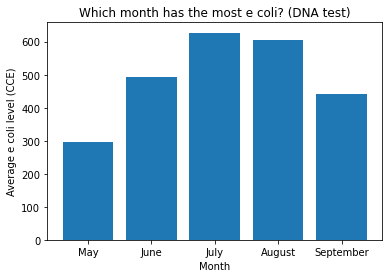

In [16]:
plt.bar(x_axis, dna_y_axis)

plt.title("Which month has the most e coli? (DNA test)")
plt.xlabel("Month")
plt.ylabel("Average e coli level (CCE)")

plt.savefig("output/DNA_monthly_mean.png")

plt.show()

In [17]:
culture_y_axis = culture_by_month["Culture Reading Mean"].mean()
culture_y_axis

Sample Month
5     162.750043
6     131.254973
7     163.658208
8     160.541246
9     147.932780
10      1.000000
Name: Culture Reading Mean, dtype: float64

In [18]:
#dropping october because there's so little data
culture_y_axis=culture_y_axis.drop(labels=10)

In [19]:
x_axis = ["May", "June", "July", "August", "September"]

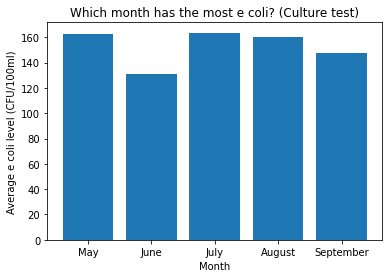

In [20]:
plt.bar(x_axis, culture_y_axis)


plt.title("Which month has the most e coli? (Culture test)")
plt.xlabel("Month")
plt.ylabel("Average e coli level (CFU/100ml)")

plt.savefig("output/Culture_monthly_mean.png")

plt.show()

In [21]:
# looking at daily data but the plot wasn't that great

In [22]:
dna_by_date = dna_data.groupby("Sample Date")
culture_by_date = culture_data.groupby("Sample Date")


In [23]:
daily_dna_means = dna_by_date["DNA Reading Mean"].mean()
daily_culture_means = culture_by_date["Culture Reading Mean"].mean()

In [24]:
len(daily_dna_means)

433

In [25]:
dates = dna_data["Sample Date"].unique()

In [26]:
len(dates)

433

In [27]:
dates.sort()
dates

array(['2015-05-26', '2015-05-27', '2015-05-28', '2015-06-01',
       '2015-06-02', '2015-06-03', '2015-06-04', '2015-06-09',
       '2015-06-10', '2015-06-11', '2015-06-12', '2015-06-16',
       '2015-06-17', '2015-06-18', '2015-06-19', '2015-06-23',
       '2015-06-24', '2015-06-25', '2015-06-26', '2015-06-30',
       '2015-07-01', '2015-07-02', '2015-07-07', '2015-07-08',
       '2015-07-09', '2015-07-10', '2015-07-14', '2015-07-15',
       '2015-07-16', '2015-07-17', '2015-07-21', '2015-07-22',
       '2015-07-23', '2015-07-24', '2015-07-28', '2015-07-29',
       '2015-07-30', '2015-07-31', '2015-08-04', '2015-08-05',
       '2015-08-06', '2015-08-07', '2015-08-11', '2015-08-12',
       '2015-08-13', '2015-08-14', '2015-08-18', '2015-08-19',
       '2015-08-20', '2015-08-21', '2015-08-25', '2015-08-26',
       '2015-08-27', '2015-08-28', '2016-05-26', '2016-06-01',
       '2016-06-02', '2016-06-03', '2016-06-04', '2016-06-05',
       '2016-06-08', '2016-06-09', '2016-06-10', '2016-

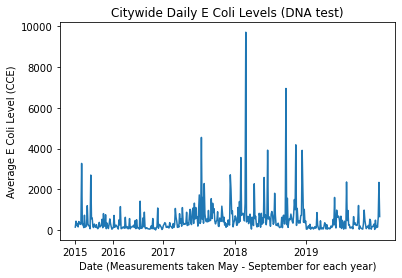

In [28]:
dna_daily_x = dates
dna_daily_y = daily_dna_means

plt.plot(dna_daily_x, dna_daily_y)


plt.title("Citywide Daily E Coli Levels (DNA test)")
plt.xlabel("Date (Measurements taken May - September for each year)")
plt.xticks(('2015-05-26', '2016-05-26', '2017-05-26', '2018-05-25', '2019-05-24'), ("2015", "2016", "2017", "2018", "2019"))
plt.ylabel("Average E Coli Level (CCE)")

plt.savefig("output/Culture_monthly_mean.png")

plt.show()

In [29]:
len(daily_culture_means)

961

In [30]:
culture_dates = culture_data["Sample Date"].unique()
len(culture_dates)

961

In [31]:
culture_dates.sort()
culture_dates

array(['2006-05-23', '2006-05-24', '2006-05-25', '2006-05-26',
       '2006-05-30', '2006-05-31', '2006-06-01', '2006-06-02',
       '2006-06-05', '2006-06-06', '2006-06-07', '2006-06-08',
       '2006-06-12', '2006-06-13', '2006-06-14', '2006-06-15',
       '2006-06-16', '2006-06-19', '2006-06-20', '2006-06-21',
       '2006-06-22', '2006-06-23', '2006-06-25', '2006-06-26',
       '2006-06-27', '2006-06-28', '2006-06-29', '2006-06-30',
       '2006-07-03', '2006-07-07', '2006-07-10', '2006-07-11',
       '2006-07-12', '2006-07-13', '2006-07-14', '2006-07-17',
       '2006-07-18', '2006-07-19', '2006-07-20', '2006-07-21',
       '2006-07-22', '2006-07-24', '2006-07-25', '2006-07-26',
       '2006-07-27', '2006-07-28', '2006-07-29', '2006-07-31',
       '2006-08-01', '2006-08-02', '2006-08-03', '2006-08-04',
       '2006-08-07', '2006-08-08', '2006-08-09', '2006-08-10',
       '2006-08-11', '2006-08-12', '2006-08-13', '2006-08-14',
       '2006-08-15', '2006-08-16', '2006-08-17', '2006-

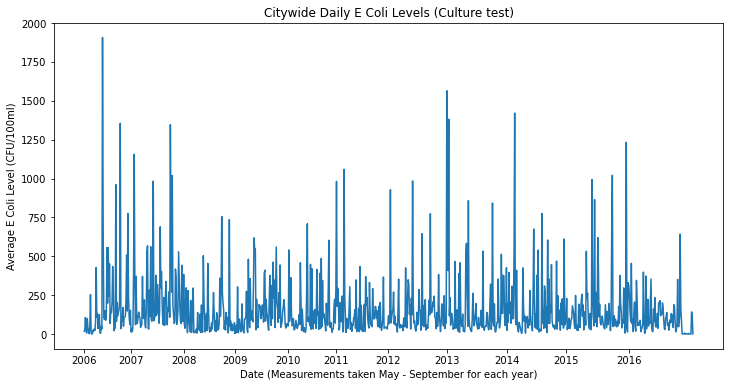

In [32]:
plt.figure(figsize=(12,6))

plt.plot(culture_dates, daily_culture_means)

plt.title("Citywide Daily E Coli Levels (Culture test)")
plt.xlabel("Date (Measurements taken May - September for each year)")
plt.xticks(('2006-05-23', '2007-05-28', '2008-05-27', '2009-05-11', '2010-05-25', '2011-05-23', 
            '2012-05-22', '2013-05-21', '2014-05-20', '2015-05-19', '2016-05-26'), 
           ("2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016"))
plt.ylabel("Average E Coli Level (CFU/100ml)")


plt.savefig("output/Culture_monthly_mean.png")

plt.show()

In [33]:
#tidying the daily means and exporting as .csv

In [34]:
daily_dna_means = daily_dna_means.to_frame()
daily_culture_means = daily_culture_means.to_frame()

In [35]:
daily_dna_means.reset_index(drop=False, inplace=True)
daily_culture_means.reset_index(drop=False, inplace=True)

In [36]:
daily_dna_means=daily_dna_means.rename(columns = {"Sample Date":"Date","DNA Reading Mean":"Citywide Mean E Coli Level"})

In [37]:
daily_culture_means.columns

Index(['Sample Date', 'Culture Reading Mean'], dtype='object')

In [38]:
daily_culture_means = daily_culture_means.rename(columns = {"Sample Date":"Date","Culture Reading Mean":"Citywide Mean E Coli Level"})

In [39]:
daily_dna_means.to_csv('DNA_daily_citywide_means.csv')
daily_culture_means.to_csv('culture_daily_citywide_means.csv')

In [40]:
########## looking at correlation with milwaukee #################

In [41]:
#Is beach water affected by Milwaukee weather?

# When Milwaukee gets an unusually high amount of rain, the city's combined rainwater and sewage system dumps
# excess water into Lake Michigan. There are documented cases of this leading to increased levels of e coli and 
# other harmful substances in the area around Milwaukee: https://madison.com/ct/news/local/environment/as-rains-intensify-sewage-surges-into-wisconsin-waters/article_cc767155-3bb4-5d4e-9d68-fcaefc70bc4f.html
# Including an outbreak of cryptosporidium in 1993 that made over 400,000 people in the Milwaukee area sick!

# Our group wanted to know if Milwaukee's sewage overflows reached Chicago and increased e coli levels here. We used
# the data from 2017 onward because we had the most complete weather and e coli data for those years, and a 14-day
# rolling average to capture the overall raininess preceeding each measurement, and to give any sewage time to make it
# down to Chicago. We found that Chicago's e coli levels are actually negatively correlated with rain in Milwaukee.
# If there is an effect, it seems to be drowned out by other factors affecting our e coli levels, potentially including
# Chicago's own sewage management. 

In [42]:
#importing Milwaukee weather data

In [43]:
Milwaukee = pd.read_csv("Milwaukee_DNA_Rainfall.csv")

In [44]:
Milwaukee.head()

,Unnamed: 0,Date,Rainfall (In)
0,390,2015-05-26,0.0
1,274,2015-05-27,0.0
2,406,2015-05-28,0.0
3,200,2015-06-01,0.0
4,178,2015-06-02,0.0


In [45]:
#adding the rolling average. The window parameter below sets how many days to average

Milwaukee["Rolling avg"] = Milwaukee.rolling(window=14, on="Date")["Rainfall (In)"].mean()

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

In [46]:
Milwaukee.head(20)

,Unnamed: 0,Date,Rainfall (In),Rolling avg
0,390,2015-05-26,0.0,NaN
1,274,2015-05-27,0.0,NaN
2,406,2015-05-28,0.0,NaN
3,200,2015-06-01,0.0,NaN
4,178,2015-06-02,0.0,NaN
5,430,2015-06-03,0.0,NaN
6,392,2015-06-04,0.0,NaN
7,409,2015-06-09,0.0,NaN
8,420,2015-06-10,0.0,NaN
9,283,2015-06-11,0.0,NaN


In [47]:
#add to the e coli data

comparison = daily_dna_means.merge(Milwaukee, how="left", on="Date")
comparison.head(20)

,Date,Citywide Mean E Coli Level,Unnamed: 0,Rainfall (In),Rolling avg
0,2015-05-26,147.8,390,0.0,NaN
1,2015-05-27,438.0,274,0.0,NaN
2,2015-05-28,223.4,406,0.0,NaN
3,2015-06-01,331.0,200,0.0,NaN
4,2015-06-02,157.8,178,0.0,NaN
5,2015-06-03,420.8,430,0.0,NaN
6,2015-06-04,359.6,392,0.0,NaN
7,2015-06-09,278.2,409,0.0,NaN
8,2015-06-10,318.0,420,0.0,NaN
9,2015-06-11,3273.0,283,0.0,NaN


In [48]:
for index, row in comparison.iterrows():

    date = row["Date"]
    
    formatted = datetime.datetime.strptime(date, "%Y-%m-%d")
    
    comparison.loc[index, "year"] = formatted.year

In [49]:
#restricted this to 2017 onward, since we had the most complete e coli and weather data for those years

comparison = comparison.loc[comparison["year"]>=2017,:]

In [50]:
comparison.head()

,Date,Citywide Mean E Coli Level,Unnamed: 0,Rainfall (In),Rolling avg,year
124,2017-05-26,76.500000,290,0.0,0.0,2017.0
125,2017-05-27,222.893750,311,0.0,0.0,2017.0
126,2017-05-28,279.129412,186,0.0,0.0,2017.0
127,2017-05-29,365.970000,277,0.0,0.0,2017.0
128,2017-05-30,334.300000,380,0.0,0.0,2017.0


In [51]:
#plotting
mke_x = comparison["Citywide Mean E Coli Level"]
mke_y = comparison["Rolling avg"]

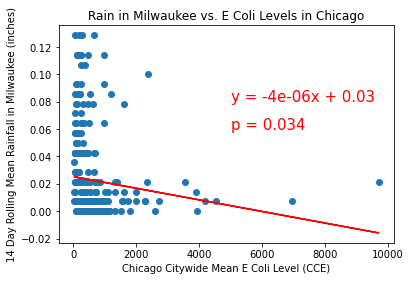

In [52]:
plt.scatter(mke_x, mke_y)
plt.ylabel("14 Day Rolling Mean Rainfall in Milwaukee (inches)")
plt.xlabel("Chicago Citywide Mean E Coli Level (CCE)")
plt.title("Rain in Milwaukee vs. E Coli Levels in Chicago")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mke_x, mke_y)
regress_values = mke_x * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,2))
plt.plot(mke_x,regress_values,"r-")
plt.annotate(line_eq,(5000,.08),fontsize=15,color="red")
plt.annotate(f"p = {round(pvalue,3)}",(5000,.06),fontsize=15,color="red")

plt.savefig("output/14_Day_Rolling_Rain_v_E_Coli")

In [53]:
pvalue

0.0336760798786981

In [54]:
slope

-4.232890239148766e-06